# Benchmarking
The purpose of this notebook is to benchmark the performance of see-classify on different datasets.

# Distribution of Population

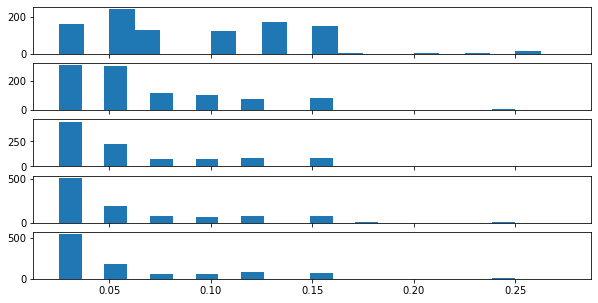

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TODO: Remove slurm id
population_datasets = [
    "moons_population_10_10_30214803.csv",
    "circles_population_10_10_30214804.csv",
    "linearly_separable_population_10_10_30214802.csv",
]
hof_datasets = [
    "moons_hof_10_10_30214803.csv",
    "circles_hof_10_10_30214804.csv",
    "linearly_separable_hof_10_10_30214802.csv",
]

# Examine distribution of fitness over each generation
# We observe that with each coming generation more of the population has the min
# fitness value.

# Observing the aggregate of all trials we observe that the first bin increases
# with each generation.
idx = 0
hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=";")
population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=";")

median = []
mean = []
min_val = []
max_val = []

num_subplots = 5
fig, axs = plt.subplots(
    num_subplots,
    figsize=(10, 5),
    sharex=True,
)
for i in range(num_subplots):
    rows = population_df[population_df[0] == i]
    fitness = rows[2]
    # axs[i].hist(fitness, bins=[0,0.03, 0.05, 0.076, 0.1])
    # axs[i].hist(fitness, bins=20, density=True)
    axs[i].hist(fitness, bins=20)

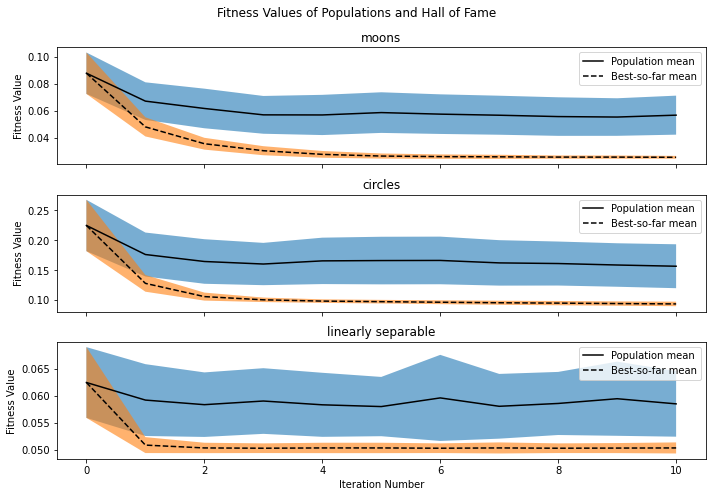

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# I did a 100 trials. I averaged the mean of each trial's best
# and that's the bottom line. I averaged their means and each of
#

# TODO: Remove slurm id
population_datasets = [
    "moons_population_10_10_30214803.csv",
    "circles_population_10_10_30214804.csv",
    "linearly_separable_population_10_10_30214802.csv",
]
hof_datasets = [
    "moons_hof_10_10_30214803.csv",
    "circles_hof_10_10_30214804.csv",
    "linearly_separable_hof_10_10_30214802.csv",
]

ds_names = ["moons", "circles", "linearly separable"]

fig, axs = plt.subplots(3, sharex=True, figsize=(10, 7))

fig.suptitle("Fitness Values of Populations and Hall of Fame")
# fig.supxlabel('Iteration Number')
# fig.supylabel('Fitness Value')
for idx in range(3):
    hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=";")
    population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=";")

    # Using a line plot we show how generational fitness average changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, 11))

    # trials x generation number
    trial_means = np.zeros((100, 11))

    for i in range(0, 100):
        sample = population_df[10 * 11 * i : 10 * 11 * (i + 1)]
        for j in range(0, 11):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            trial_means[i, j] = rows[2].mean()
            # trial_means[i,j] = np.median(rows[2])

    means_of_means = np.zeros(11)
    for i in range(11):
        means_of_means[i] = trial_means[:, i].mean()
        # means_of_means[i] = np.median(trial_means[:,i])

    std_sample_means = np.zeros(11)
    for i in range(11):
        rows = population_df[population_df[0] == i]
        pop_std = rows[2].std()
        std_sample_means[i] = pop_std / np.sqrt(10)

    # Using a line plot we show how generational fitness hof changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, 11))

    # trials x generation number
    hof_trial_means = np.zeros((100, 11))

    for i in range(0, 100):
        sample = hof_df[10 * 11 * i : 10 * 11 * (i + 1)]
        for j in range(0, 11):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_means[i, j] = rows[2].mean()
            # hof_trial_means[i,j] = np.median(rows[2])

    hof_std_sample_means = np.zeros(11)
    for i in range(11):
        rows = hof_df[population_df[0] == i]
        pop_std = rows[2].std()
        hof_std_sample_means[i] = pop_std / np.sqrt(10)

    hof_means_of_means = np.zeros(11)
    for i in range(11):
        hof_means_of_means[i] = hof_trial_means[:, i].mean()
        # hof_means_of_means[i] = np.median(hof_trial_means[:,i])

    alpha = 0.6
    axs[idx].plot(generations, means_of_means, "k-", label="Population mean")
    axs[idx].fill_between(
        generations,
        means_of_means - 1 * std_sample_means,
        means_of_means + 1 * std_sample_means,
        alpha=alpha,
    )
    axs[idx].plot(generations, hof_means_of_means, "k--", label="Best-so-far mean")
    axs[idx].fill_between(
        generations,
        hof_means_of_means - 1 * hof_std_sample_means,
        hof_means_of_means + 1 * hof_std_sample_means,
        alpha=alpha,
    )

    axs[idx].set_title(ds_names[idx])

    axs[idx].legend()

    axs[idx].set_ylabel("Fitness Value")
    if idx == 2:
        axs[idx].set_xlabel("Iteration Number")

plt.tight_layout()

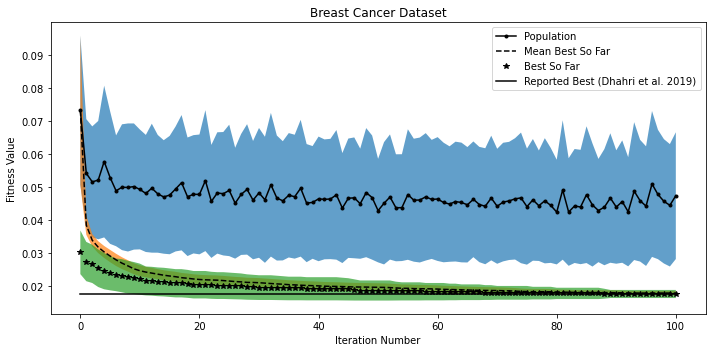

In [15]:
# Repeat above figure for breast cancer dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

slurm_id = 30323530
# I did a 100 trials. I averaged the mean of each trial's best 
# and that's the bottom line. I averaged their means and each of
#

# TODO: Remove slurm id
#hof_datasets = ['dhahri_hof_10_10_30214818.csv']
#population_datasets = ['dhahri_population_10_10_30214818.csv']
#hof_datasets = ['dhahri_hof_100_10_30214817.csv']
#population_datasets = ['dhahri_population_100_10_30214817.csv']
hof_datasets = [f'dhahri_hof_100_10_{slurm_id}.csv']
population_datasets = [f'dhahri_population_100_10_{slurm_id}.csv']

num_gen = 100
pop_size = 10

fig, axs = plt.subplots(1, sharex=True, figsize=(10, 5))

for idx in range(1):
    slice_gen = 100 # allows us to plot the range between 0 and a specific generation number
    hof_df = pd.read_csv(hof_datasets[idx], header=None, delimiter=';')
    population_df = pd.read_csv(population_datasets[idx], header=None, delimiter=';')

    # Using a line plot we show how generational fitness average changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, slice_gen + 1))

    # trials x generation number
    trial_means = np.zeros((100, slice_gen + 1))

    for i in range(0, 100):
        sample = population_df[(num_gen+1)*(pop_size)*i: (num_gen + 1)*(pop_size)*(i+1)]
        for j in range(0, slice_gen+1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            trial_means[i, j] = rows[2].mean()
            # trial_means[i,j] = np.median(rows[2])

    means_of_means = np.zeros(slice_gen+1)
    for i in range(slice_gen+1):
        means_of_means[i] = trial_means[:,i].mean()
        #means_of_means[i] = np.median(trial_means[:,i])


    std_sample_means = np.zeros(slice_gen+1)
    for i in range(slice_gen+1):
        rows = population_df[population_df[0] == i]
        pop_std = rows[2].std()
        std_sample_means[i] = pop_std/np.sqrt(pop_size)

    # Using a line plot we show how generational fitness hof changes
    # Using means of means and standard deviation of the sample means

    generations = list(range(0, slice_gen+1))

    # Trials x generation number
    hof_trial_means = np.zeros((100, slice_gen+1))

    for i in range(0, 100):
        sample = hof_df[(num_gen+1)*(pop_size)*i: (num_gen + 1)*(pop_size)*(i+1)]
        for j in range(0, slice_gen+1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_means[i, j] = rows[2].mean()
            # hof_trial_means[i,j] = np.median(rows[2])

    hof_std_sample_means = np.zeros(slice_gen+1)
    for i in range(slice_gen+1):
        rows = hof_df[population_df[0] == i]
        pop_std = rows[2].std()
        hof_std_sample_means[i] = pop_std/np.sqrt(pop_size)

    hof_means_of_means = np.zeros(slice_gen+1)
    for i in range(slice_gen+1):
        hof_means_of_means[i] = hof_trial_means[:,i].mean()
        #hof_means_of_means[i] = np.median(hof_trial_means[:,i])

    # Trials x generation number
    hof_trial_mins = np.zeros((100, slice_gen+1))
    
    for i in range(0, 100):
        sample = population_df[(num_gen+1)*(pop_size)*i: (num_gen + 1)*(pop_size)*(i+1)]
        #sample = hof_df[10*11*i: 10*11*(i+1)]
        for j in range(0, slice_gen+1):
            # Get all rows for generation j
            rows = sample[sample[0] == j]
            hof_trial_mins[i,j] = (rows[2].min())
    
    hof_means_of_mins = np.zeros(slice_gen+1)
    for i in range(slice_gen+1):
        hof_means_of_mins[i] = hof_trial_mins[:,i].mean()
        #hof_means_of_mins[i] = np.median(hof_trial_mins[:,i])


    hof_std_of_mins = np.zeros(slice_gen+1)
    for i in range(slice_gen+1):
        hof_std_of_mins[i] = hof_trial_mins[:,i].std()
    
    alpha=0.7
    axs.plot(generations, means_of_means, 'k.-', label='Population')
    axs.fill_between(generations, means_of_means - 1 *std_sample_means, means_of_means + 1*std_sample_means, alpha=alpha)
    axs.plot(generations, hof_means_of_means, 'k--', label='Mean Best So Far')
    axs.fill_between(generations, hof_means_of_means - 1*hof_std_sample_means, hof_means_of_means + 1*hof_std_sample_means, alpha=alpha)
        
    axs.plot(generations,hof_means_of_mins, 'k*', label='Best So Far')
    axs.fill_between(generations, hof_means_of_mins - 1*hof_std_of_mins, hof_means_of_mins + 1*hof_std_of_mins, alpha=alpha)
    
    axs.plot(generations,np.repeat(1 - 0.9824, slice_gen+1), 'k-', label='Reported Best (Dhahri et al. 2019)')

    axs.legend()

    axs.set_title("Breast Cancer Dataset")
    axs.set_xlabel("Iteration Number")
    axs.set_ylabel("Fitness Value")

plt.tight_layout()

# Robustness Test
We test the robustness of the best found solutions (HOF) based on the size of the training set. We make the assumption that we can obtain the same model found during training.

In [16]:
import ast
from see import classifiers
best_hof = hof_df[hof_df[0] == 20].head(30)[3].to_numpy()
best_hof = list(map(ast.literal_eval, best_hof))
test = best_hof[0]

In [17]:
import pandas as pd
import ast
from see import classifiers
from see.classifier_helpers.helpers import generate_train_test_set
from sklearn.preprocessing import StandardScaler

best_hof = hof_df[hof_df[0] == 20].head(30)[3].to_numpy()
best_hof = list(map(ast.literal_eval, best_hof))
test = best_hof[0]

a = classifiers.Classifier.algorithmspace[test[0]](test)

# Breast Cancer Data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data'
data = pd.read_csv(url, header=None)

X = data.iloc[:,2:].to_numpy()

def diagnosis_to_category(d):
    if d == 'M':
        return 0
    elif d == 'B':
        return 1
    else:
        print('WARNING: UNKNOWN Category')

# Turn classifications Malignant(M)/Benign(B) into binary (0/1) assignments
y = np.vectorize(diagnosis_to_category)(data[1].to_numpy())

# Preprocess data
X = StandardScaler().fit_transform(X)

# Feature Selection
# src: https://scikit-learn.org/stable/auto_examples/compose/plot_feature_union.html
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA

# Table 1 suggests using 12 components for GAs
pca = PCA(n_components=12)


# Use feature union in case we want to combine multiple feature selections later
combined_features = FeatureUnion([("pca", pca)])

# Use combined features to transform dataset:
X = combined_features.fit(X, y).transform(X)

temp = generate_train_test_set(X, y, test_size=0.4)
validation_set = temp.testing_set
temp = generate_train_test_set(temp.training_set.X, temp.training_set.y, test_size=0.25)
training_set = temp.training_set
testing_set = temp.testing_set

In [19]:
from see.classifier_fitness import ClassifierFitness
from see.base_classes import pipedata
import numpy as np

partial_training_set = pipedata()
num_portions = 10
training_portions = np.round(np.linspace(0.1, 1, num_portions) * len(training_set.X))

scores = np.zeros(num_portions)
training_fitness = np.zeros(num_portions)
testing_fitness = np.zeros(num_portions)

print(a)
for idx, portion in enumerate(training_portions):
    portion = int(portion)
    partial_training_set.X = training_set.X[:portion]
    partial_training_set.y = training_set.y[:portion]

    predictions = a.evaluate(partial_training_set, validation_set)
    score = ClassifierFitness().evaluate(predictions, validation_set.y)
    scores[idx] = score
    
    predictions = a.evaluate(partial_training_set, partial_training_set)
    score = ClassifierFitness().evaluate(predictions, partial_training_set.y)
    training_fitness[idx] = score

    
    predictions = a.evaluate(validation_set, partial_training_set)
    score = ClassifierFitness().evaluate(predictions, partial_training_set.y)
    print('train on test; test on train', score)

print('training fitness: ', training_fitness)
print('validation scores: ', scores)

<class 'see.classifiers.LogisticRegressionContainer'> parameters: 
	algorithm = Logistic Regression
	max_iter = 9
	alpha = 0.795
	max_depth = 5
	n_estimators = 93
	n_neighbors = 6
	length_scale = 0.5
	learning_rate = 0.6
	kernel = rbf
	C = 0.4
	gamma = auto

train on test; test on train 0.038461538461538464
train on test; test on train 0.0392156862745098
train on test; test on train 0.03896103896103896
train on test; test on train 0.049019607843137254
train on test; test on train 0.046875
train on test; test on train 0.0457516339869281
train on test; test on train 0.0446927374301676
train on test; test on train 0.0392156862745098
train on test; test on train 0.043478260869565216
train on test; test on train 0.043137254901960784
training fitness:  [0.03846154 0.05882353 0.03896104 0.02941176 0.0234375  0.01960784
 0.02234637 0.01960784 0.00869565 0.01176471]
validation scores:  [0.06578947 0.03070175 0.01754386 0.02192982 0.01315789 0.01315789
 0.01754386 0.01754386 0.02192982 0.0131578

/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/mnt/ufs18/home-088/f0102397/Documents/GitHub/see-segment/see-classify/envs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation f

# Check median values

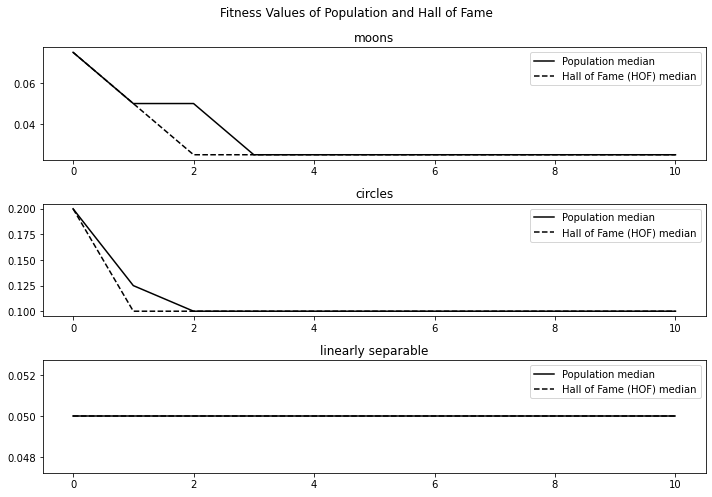

In [7]:
# Plotting MEDIANS gives strange figures...

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# TODO: Remove slurm id
population_datasets = [
    "moons_population_10_10_30214803.csv",
    "circles_population_10_10_30214804.csv",
    "linearly_separable_population_10_10_30214802.csv",
]
hof_datasets = [
    "moons_hof_10_10_30214803.csv",
    "circles_hof_10_10_30214804.csv",
    "linearly_separable_hof_10_10_30214802.csv",
]

ds_names = ["moons", "circles", "linearly separable"]

fig, axes = plt.subplots(3, figsize=(10, 7))
fig.suptitle("Fitness Values of Population and Hall of Fame")
for ds_count in range(3):
    generations = list(range(11))
    low_bound = np.zeros(11)
    up_bound = np.zeros(11)
    medians = np.zeros(11)
    df = pd.read_csv(population_datasets[ds_count], header=None, delimiter=";")
    for i in range(11):
        gen = df[df[0] == i]  # extract each generation
        gen_fit = gen[2]
        # 80% data
        low_bound[i] = gen_fit.quantile(0.2)
        up_bound[i] = gen_fit.quantile(0.8)
        medians[i] = gen_fit.quantile(0.5)

    axes[ds_count].plot(generations, medians, "k-", label="Population median")
    # axes[ds_count].fill_between(generations, low_bound, up_bound, label='Population 20th-80th percentile region')

    df = pd.read_csv(hof_datasets[ds_count], header=None, delimiter=";")
    for i in range(11):
        gen = df[df[0] == i]  # extract each generation
        gen_fit = gen[2]
        # 80% data
        low_bound[i] = gen_fit.quantile(0.2)
        up_bound[i] = gen_fit.quantile(0.8)
        medians[i] = gen_fit.quantile(0.5)

    axes[ds_count].plot(generations, medians, "k--", label="Hall of Fame (HOF) median")
    # axes[ds_count].fill_between(generations, low_bound, up_bound, label='HOF 20th-80th percentile region')

    axes[ds_count].legend()
    axes[ds_count].set_title(ds_names[ds_count])

plt.tight_layout()
# We plot the medians of each generation of the population
# and the Hall of Fame, along 80% region around the median.
# This shows that the regions and the lines overlap, which
# indicates that it is possible to randomly select a good solution
# for each of these datasets. This suggests that the datasets
# are easy to find solutions to.